In [1]:
import os
import matplotlib.pyplot as plt
# import cvxpy as cp
import cvxportfolio as cvx
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [2]:
cvx.forecast.HistoricalFactorizedCovariance()

HistoricalFactorizedCovariance(half_life=inf, rolling=inf, kelly=True)

In [3]:
prices = [[100]*10]
corr = np.array([[1., 0.19525643, 0.39917748, -0.39418553, -0.00707647, -0.67112039, 0.01641167, 0.51935931, 0.01156094, -0.12535449],
                    [0.19525643, 1., -0.07321996, -0.21788827, -0.18569623, 0.13150835, -0.60040443, -0.53314565, 0.05302451, -0.26636013],
                    [0.39917748, -0.07321996, 1., -0.15891728, 0.67221197, -0.31235951, 0.53347361, -0.0530431, -0.76791062, -0.45707164],
                    [-0.39418553, -0.21788827, -0.15891728, 1., 0.3489336, 0.35257993, 0.45167662, 0.08117293, 0.09709185, -0.37131356],
                    [-0.00707647, -0.18569623, 0.67221197, 0.3489336, 1., -0.26214982, 0.60173726, 0.02792043, -0.51561155, -0.570016],
                    [-0.67112039, 0.13150835, -0.31235951, 0.35257993, -0.26214982, 1., -0.19752891, -0.61942314, -0.12761225, -0.20618394],
                    [0.01641167, -0.60040443, 0.53347361, 0.45167662, 0.60173726, -0.19752891, 1., 0.3605392, -0.22767222, -0.13848597],
                    [0.51935931, -0.53314565, -0.0530431, 0.08117293, 0.02792043, -0.61942314, 0.3605392, 1., 0.4291785, 0.29031668],
                    [0.01156094, 0.05302451, -0.76791062, 0.09709185, -0.51561155, -0.12761225, -0.22767222, 0.4291785, 1., 0.5735452],
                    [-0.12535449, -0.26636013, -0.45707164, -0.37131356, -0.570016, -0.20618394, -0.13848597, 0.29031668, 0.5735452, 1.]])
mu = np.array([0.09070628, 0.08425672, 0.05552159, 0.06445937, 0.06549034,
     0.06249785, 0.07575028, 0.07677769, 0.0678443, 0.06768946])
chol = np.linalg.cholesky(corr)
for i in range(132):
    
    bm = np.random.normal(0, 2, 10)

    prices_temp = mu + bm @ chol
    
    prices.append((prices_temp + prices[-1]).tolist())

# returns = (np.array(returns[1:]) - np.array(returns[:-1]))/np.array(returns[:-1])
returns = ((np.array(prices[1:]) - np.array(prices[:-1]))/np.array(prices[:-1])).T.tolist()
returns.append(np.random.uniform(0.0015, 0.0025, 132))
returns = np.array(returns)
returns = returns.T
prices = np.array(prices)
volumes = prices*10000000

In [4]:
ret = pd.DataFrame(returns)

datetime_list = []

for i in range(2012,2023):
    for j in range(1,13):
        datetime_list.append(datetime.datetime(i, j, 1))

ret.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)] + ['USDOLLAR']
ret.columns = new_column_names


price = pd.DataFrame(prices)
volume = pd.DataFrame(volumes)

datetime_list.insert(0, datetime.datetime(2011, 12, 1))
price.index = datetime_list
volume.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)]
price.columns = new_column_names
volume.columns = new_column_names

In [5]:
ret


,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,Stock 10,USDOLLAR
2012-01-01,0.042609,-0.005362,-0.012343,0.025534,0.015386,-0.011361,0.011465,0.000129,0.003574,0.000675,0.001860
2012-02-01,-0.044797,0.045895,-0.007191,0.043832,-0.010628,0.040728,-0.011936,-0.010420,0.003695,0.000671,0.001754
2012-03-01,0.019602,0.028660,0.009961,0.012795,-0.011366,-0.002733,0.016477,-0.007252,0.005938,0.000674,0.001981
2012-04-01,0.041164,-0.053010,0.007692,-0.008716,0.007473,-0.011532,0.003240,0.002920,-0.004303,0.000676,0.002166
2012-05-01,-0.024671,-0.014688,0.075156,0.011430,0.011000,0.021646,-0.017006,-0.013620,-0.016341,0.000673,0.001710
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.015728,0.027526,-0.016914,-0.034792,-0.022357,0.001729,-0.000645,-0.006658,0.003061,0.000623,0.001583
2022-09-01,0.000909,-0.041336,0.013155,0.002832,0.003110,-0.013131,0.020837,0.025197,0.006741,0.000629,0.002143
2022-10-01,-0.014403,-0.006465,-0.010220,0.000795,-0.010960,0.002075,-0.009728,-0.001155,-0.003148,0.000623,0.001718
2022-11-01,0.002088,-0.018145,0.012964,0.009995,0.011007,-0.001884,0.003483,0.005674,-0.000424,0.000624,0.002454


In [6]:
prices_real = pd.read_csv("prices_real.csv")
returns_real = pd.read_csv("returns_real.csv")
volumes_real = pd.read_csv("volumes_real.csv")

prices_real.loc[:, 'Date'] = pd.to_datetime(prices_real['Date'])
returns_real.loc[:, 'Date'] = pd.to_datetime(returns_real['Date'])
volumes_real.loc[:, 'Date'] = pd.to_datetime(volumes_real['Date'])

prices_real = prices_real.set_index('Date')
returns_real = returns_real.set_index('Date')
volumes_real = volumes_real.set_index('Date')

returns_real = returns_real.rename(columns={'FEDFUNDS': 'USDOLLAR'})
returns_real.drop('ABNB', axis=1, inplace=True)
returns_real.drop('UBER', axis=1, inplace=True)
returns_real = returns_real.dropna()

prices_real.drop('ABNB', axis=1, inplace=True)
prices_real.drop('UBER', axis=1, inplace=True)
prices_real = prices_real.dropna()

volumes_real.drop('ABNB', axis=1, inplace=True)
volumes_real.drop('UBER', axis=1, inplace=True)
volumes_real = volumes_real.dropna()

In [7]:
returns_real

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA,USDOLLAR
Date,,,,,,,,
2010-11-19,0.003959,0.015326,0.018423,0.001432,0.002047,-0.009605,0.032282,0.000008
2010-11-22,0.033794,0.000000,-0.006874,-0.005837,-0.005254,0.000660,0.000727,0.000008
2010-11-23,-0.012853,-0.024151,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256,0.000008
2010-11-24,0.053805,0.006961,0.027622,0.014434,0.006917,0.020514,0.024554,0.000008
2010-11-26,-0.000282,-0.003840,-0.012350,-0.010612,0.009558,-0.008353,-0.012346,0.000008
...,...,...,...,...,...,...,...,...
2024-03-13,0.006671,0.019567,-0.005457,0.013167,0.026779,0.008237,-0.011152,0.000206
2024-03-14,0.012404,-0.010309,0.010300,0.011762,-0.021858,0.025360,-0.032392,0.000206
2024-03-15,-0.024224,0.001362,-0.003684,-0.000963,0.033266,-0.015034,-0.001217,0.000206


In [8]:
# Historical Data

# Initialize stock market simulator
simulator = cvx.MarketSimulator(returns = returns_real, volumes = volumes_real, prices = prices_real)

# Create objective function and constraints to the optimization problem

constraints = []
gamma_trade = 2.5
gamma_hold = 2.5

def make_policy(gamma_trade, gamma_risk, constraints):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2022-01-01', end_time='2023-01-01')


# MULTI-PERIOD OPTIMIZATION


###########################################################
Universe size                                             8
Initial timestamp                       2022-01-03 00:00:00
Final timestamp                         2022-12-30 00:00:00
Number of periods                                       251
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            3.288e+05
Profit (USDOLLAR)                                -6.712e+05
                                                           
Avg. return (annualized)                             -68.0%
Volatility (annualized)                               94.0%
Avg. excess return (annualized)                      -69.7%
Avg. active return (annualized)                      -69.7%
Excess volatility (annualized)                        94.0%
Active volatility (annualized)                        94.0%
                                                           
Avg. grow

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


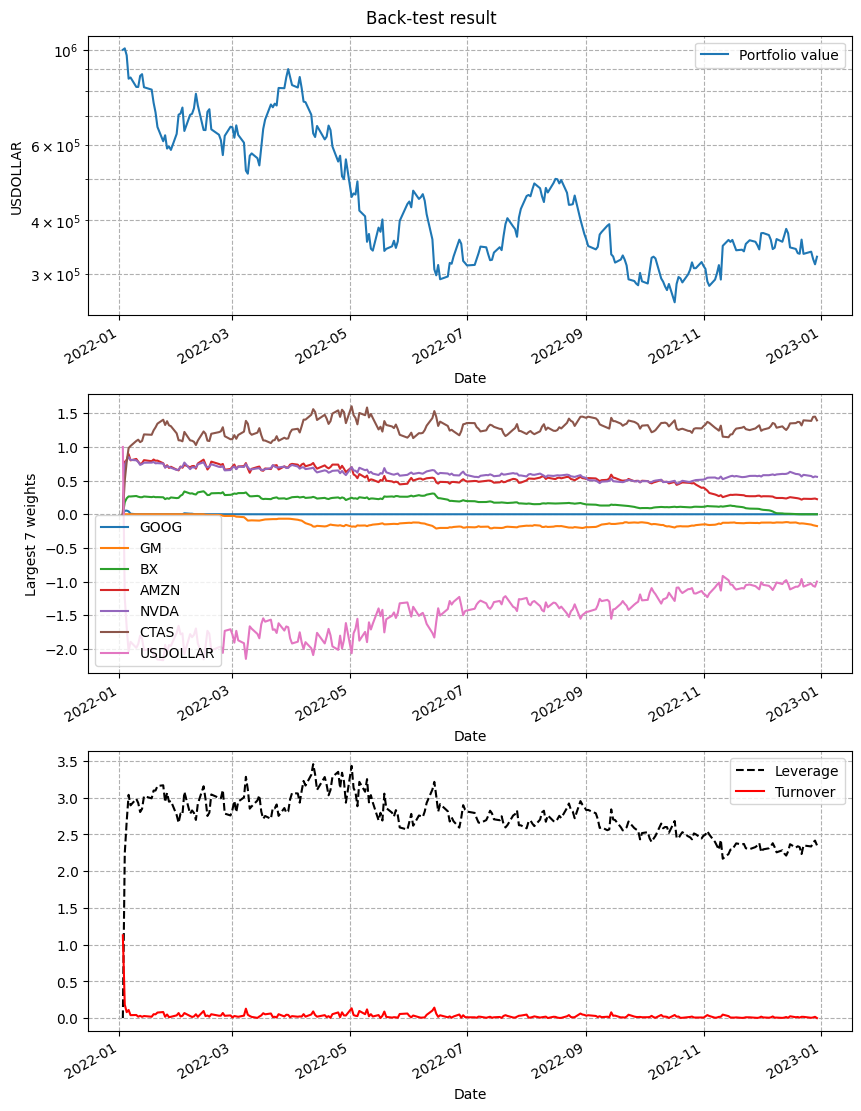

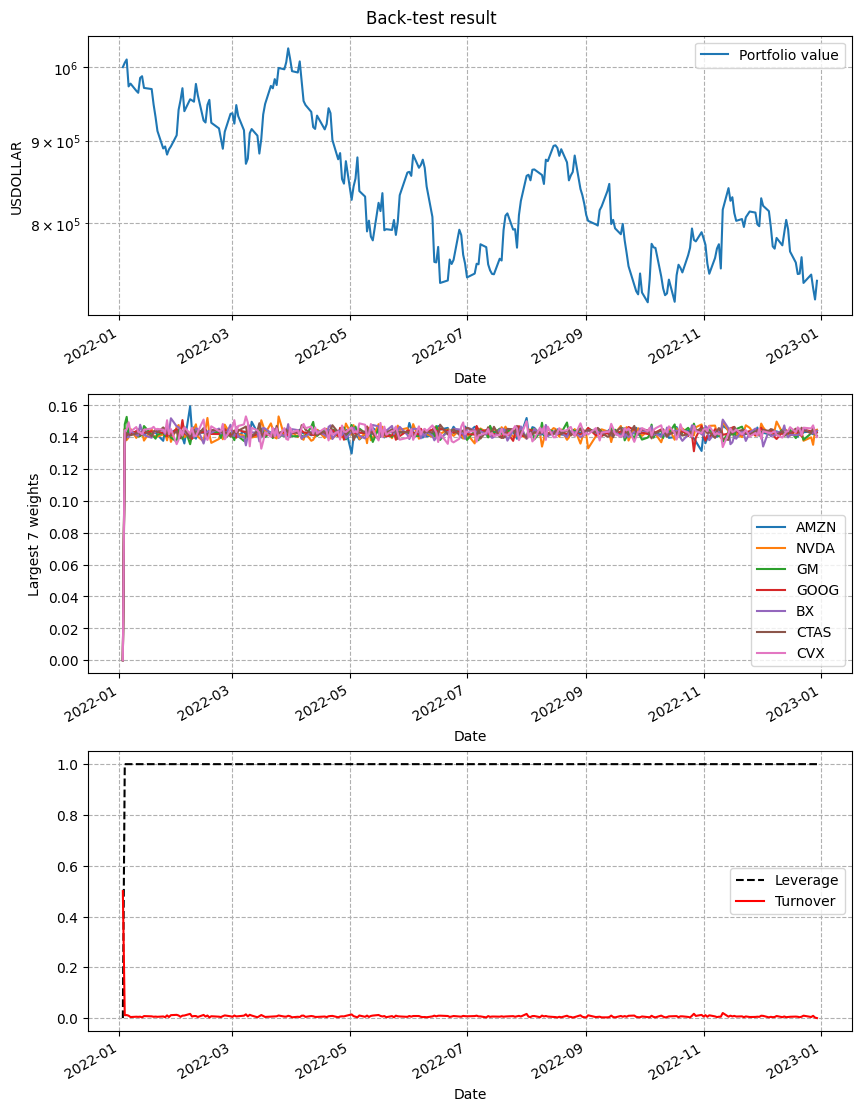

In [9]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results[0].plot()

# plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [10]:
stocks = returns_real.columns

In [11]:
returns_real

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA,USDOLLAR
Date,,,,,,,,
2010-11-19,0.003959,0.015326,0.018423,0.001432,0.002047,-0.009605,0.032282,0.000008
2010-11-22,0.033794,0.000000,-0.006874,-0.005837,-0.005254,0.000660,0.000727,0.000008
2010-11-23,-0.012853,-0.024151,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256,0.000008
2010-11-24,0.053805,0.006961,0.027622,0.014434,0.006917,0.020514,0.024554,0.000008
2010-11-26,-0.000282,-0.003840,-0.012350,-0.010612,0.009558,-0.008353,-0.012346,0.000008
...,...,...,...,...,...,...,...,...
2024-03-13,0.006671,0.019567,-0.005457,0.013167,0.026779,0.008237,-0.011152,0.000206
2024-03-14,0.012404,-0.010309,0.010300,0.011762,-0.021858,0.025360,-0.032392,0.000206
2024-03-15,-0.024224,0.001362,-0.003684,-0.000963,0.033266,-0.015034,-0.001217,0.000206


In [12]:
prices_real

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA
Date,,,,,,,
2010-11-18,8.208500,6.590600,22.881990,49.477310,25.950752,14.858307,3.054616
2010-11-19,8.241000,6.691606,23.303545,49.548138,26.003874,14.715592,3.153226
2010-11-22,8.519500,6.691606,23.143354,49.258915,25.867260,14.725306,3.155519
2010-11-23,8.410000,6.529995,22.586901,48.255436,25.237280,14.520822,3.082134
2010-11-24,8.862500,6.575448,23.210802,48.951973,25.411848,14.818706,3.157813
...,...,...,...,...,...,...,...
2024-03-13,176.559998,126.099998,623.280029,153.889999,40.259998,140.770004,908.880005
2024-03-14,178.750000,124.800003,629.700012,155.699997,39.380001,144.339996,879.440002
2024-03-15,174.419998,124.970001,627.380005,155.550003,40.689999,142.169998,878.369995


In [13]:
returns_prev = returns_real[returns_real.index < pd.Timestamp('2022-01-01')]
stocks_only = returns_prev[['AMZN', 'BX', 'CTAS', 'CVX', 'GM', 'GOOG', 'NVDA']]
stockmat = stocks_only.to_numpy()
stockmat = stockmat.T
x = np.mean(stockmat, axis=1)
cor = np.corrcoef(stockmat)
bx = stockmat[1]
var_bx = np.var(stockmat[1])

In [14]:
returns_2 = returns_real[returns_real.index >= pd.Timestamp('2022-01-01')]
returns_2 = returns_2[returns_2.index <= pd.Timestamp('2023-01-01')]
stocks_2 = returns_2[['AMZN', 'BX', 'CTAS', 'CVX', 'GM', 'GOOG', 'NVDA']]
stockmat2 = stocks_2.to_numpy()
stockmat2 = stockmat2.T
bx2 = stockmat2[1]
var_bx2 = np.var(bx2)
m = var_bx2 / var_bx
m = m ** 0.5

In [15]:
demeaned = bx - np.mean(bx)
scaled = demeaned * m
newbx = scaled + np.mean(bx)
newbx = newbx.T
newbx.shape
returns_new = returns_real.copy()
returns_new.iloc[:2798, 1] = newbx
init = prices_real.iloc[0, :].to_numpy()
rets = returns_new[['AMZN', 'BX', 'CTAS', 'CVX', 'GM', 'GOOG', 'NVDA']]
ret = rets.to_numpy()
prices_new = prices_real.copy()
curr_price =  prices_real.iloc[3353, :].to_numpy()
curr_price = curr_price[1]
for i in range(len(ret) - 1, -1, -1):
    curr_ret = ret[i][1] + 1
    curr_price = curr_price / curr_ret
    prices_new.iloc[i, 1] = curr_price
    
    

In [16]:
returns_new

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA,USDOLLAR
Date,,,,,,,,
2010-11-19,0.003959,0.024259,0.018423,0.001432,0.002047,-0.009605,0.032282,0.000008
2010-11-22,0.033794,-0.000791,-0.006874,-0.005837,-0.005254,0.000660,0.000727,0.000008
2010-11-23,-0.012853,-0.040268,-0.024044,-0.020372,-0.024354,-0.013887,-0.023256,0.000008
2010-11-24,0.053805,0.010586,0.027622,0.014434,0.006917,0.020514,0.024554,0.000008
2010-11-26,-0.000282,-0.007068,-0.012350,-0.010612,0.009558,-0.008353,-0.012346,0.000008
...,...,...,...,...,...,...,...,...
2024-03-13,0.006671,0.019567,-0.005457,0.013167,0.026779,0.008237,-0.011152,0.000206
2024-03-14,0.012404,-0.010309,0.010300,0.011762,-0.021858,0.025360,-0.032392,0.000206
2024-03-15,-0.024224,0.001362,-0.003684,-0.000963,0.033266,-0.015034,-0.001217,0.000206


In [17]:
prices_new

,AMZN,BX,CTAS,CVX,GM,GOOG,NVDA
Date,,,,,,,
2010-11-18,8.208500,18.059584,22.881990,49.477310,25.950752,14.858307,3.054616
2010-11-19,8.241000,18.497694,23.303545,49.548138,26.003874,14.715592,3.153226
2010-11-22,8.519500,18.483053,23.143354,49.258915,25.867260,14.725306,3.155519
2010-11-23,8.410000,17.738780,22.586901,48.255436,25.237280,14.520822,3.082134
2010-11-24,8.862500,17.926562,23.210802,48.951973,25.411848,14.818706,3.157813
...,...,...,...,...,...,...,...
2024-03-13,176.559998,126.099998,623.280029,153.889999,40.259998,140.770004,908.880005
2024-03-14,178.750000,124.800003,629.700012,155.699997,39.380001,144.339996,879.440002
2024-03-15,174.419998,124.970001,627.380005,155.550003,40.689999,142.169998,878.369995


In [18]:
# Historical Data

# Initialize stock market simulator
simulator = cvx.MarketSimulator(returns = returns_new, volumes = volumes_real, prices = prices_new)

# Create objective function and constraints to the optimization problem

constraints = []
gamma_trade = 2.5
gamma_hold = 2.5

def make_policy(gamma_trade, gamma_risk, constraints):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2022-01-01', end_time='2023-01-01')


# MULTI-PERIOD OPTIMIZATION


###########################################################
Universe size                                             8
Initial timestamp                       2022-01-03 00:00:00
Final timestamp                         2022-12-30 00:00:00
Number of periods                                       251
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            3.440e+05
Profit (USDOLLAR)                                -6.560e+05
                                                           
Avg. return (annualized)                             -65.6%
Volatility (annualized)                               91.8%
Avg. excess return (annualized)                      -67.3%
Avg. active return (annualized)                      -67.3%
Excess volatility (annualized)                        91.8%
Active volatility (annualized)                        91.8%
                                                           
Avg. grow

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


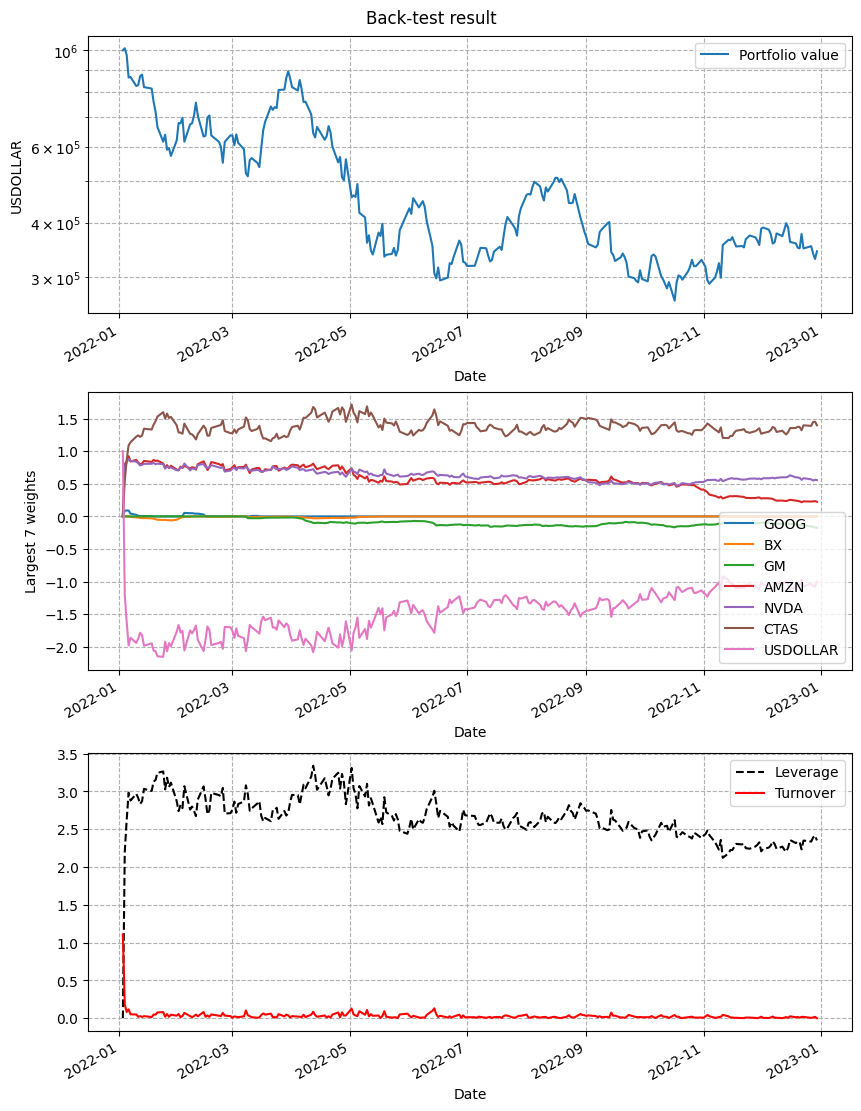

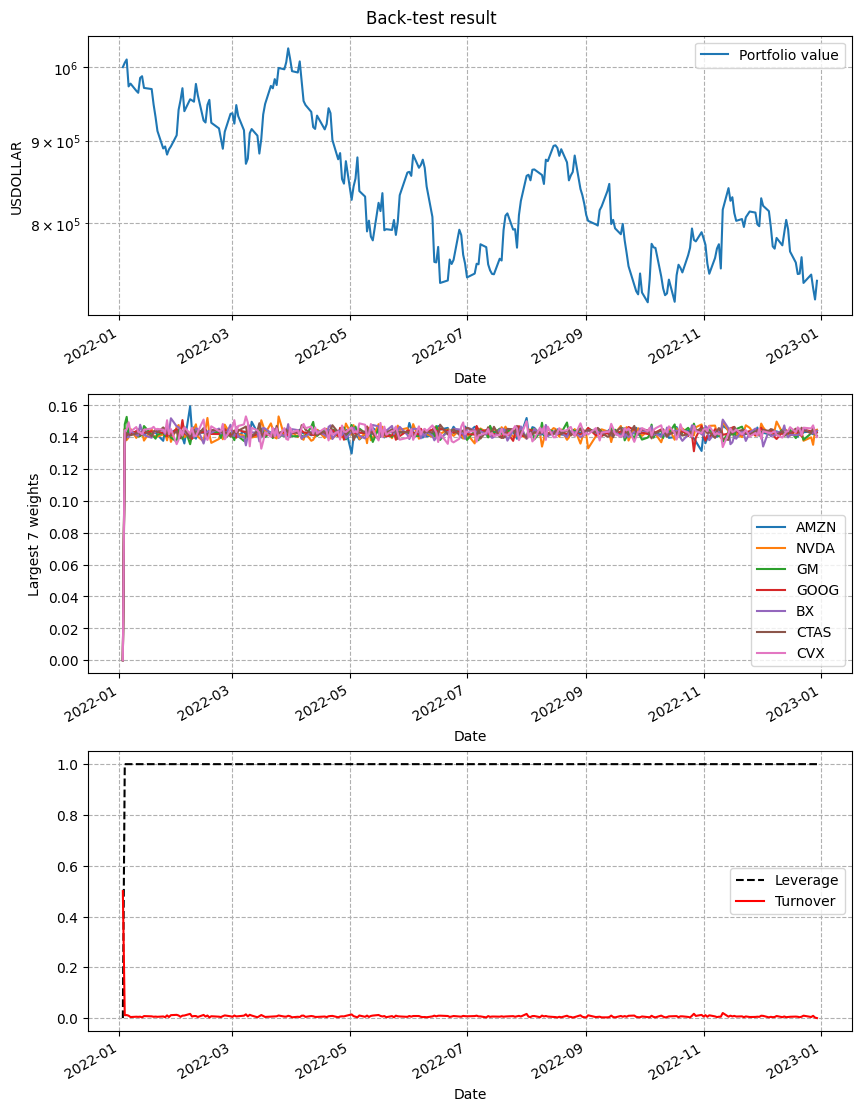

In [19]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results[0].plot()

# plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [20]:
bx_og = prices_real['BX']

In [21]:
bx_edit = prices_new['BX']

<function matplotlib.pyplot.show(close=None, block=None)>

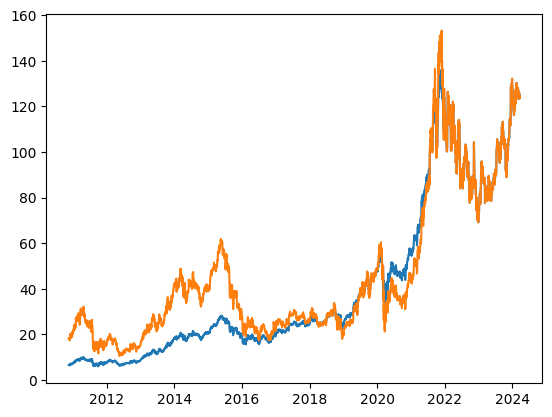

In [22]:
plt.plot(bx_og)
plt.plot(bx_edit)
plt.show

In [23]:
(3.288 - 3.44) / 3.288

-0.046228710462287145